In [2]:
from inaFaceGender import GenderVideo
import cv2
import glob
from matplotlib import pyplot as plt

In [33]:
gv = GenderVideo(threshold=0.65)

./media/1546923312_7cc94957e8_o.jpg


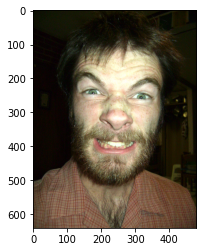

[rectangle(41,89,484,543), (454, 454), b'm', 9.142, 1.0]


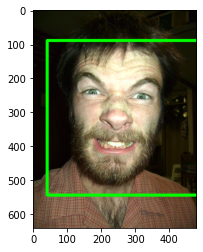

[rectangle(185,277,528,704), (427, 427), b'm', 13.806, 1.0]


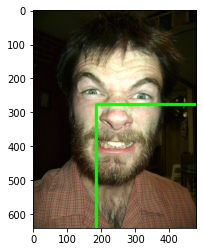

./media/Europa21_-_2.jpg


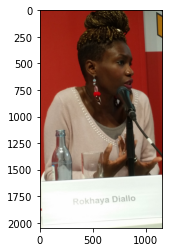

[rectangle(411,243,1059,854), (611, 611), b'f', -2.113, 1.0]


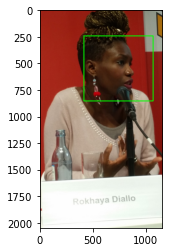

In [34]:
for e in glob.glob('./media/*.jpg'):
    print(e)
    img = cv2.imread(e)
    img2 = img[:,:,::-1]
    plt.imshow(img2)
    plt.show()
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces_info = gv.detect_faces_from_image(frame, desired_width=224,  desired_height=224)
    if faces_info:
        for element in faces_info:
            label, decision_value = gv._gender_from_face(element[1])
            bounding_box = element[0][0]
            detection_score = round(element[5], 3)
            bbox_length = bounding_box.bottom() - bounding_box.top()
            bb = bounding_box
            
            print([
                bounding_box, (bbox_length, bbox_length), label,
                decision_value, detection_score
            ])
            
            frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cv2.rectangle(frame, (bb.left(), bb.top()), (bb.right(), bb.bottom()), (0, 255, 0), 8)
            plt.imshow(frame)
            plt.show()